### Executive Summary:
In this exercise the recursive algorithm is examined by using it to compute factorials of 10 random numbers between 100 and 500. A recursive algorithm basically works by having a function call itself until it reaches a solution for the value/item specified. For example, if you have a box that contains other boxes, but one contains a key, recursion works by going through a box, then goes through every item in the box, if the key is not found, it will go through another box, and repeat the process until the key is found[1]. Recursion is therefore used to make finding a solution clearer; however, performance can be an issue as well as memory usage.  

The recursive algorithm used to compute factorials was compared with a FOR loop in relation to performance. The FOR loop modeled in this exercise looked similar to the recursive algorithm; however instead of calling itself, it went from range (n) and reached a solution by iterating through the range. In certain contexts, a loop will perform better than recursion, and may take up less memory. Further explanation on how these algorithms work are explained in this exercise, and how they relate to Big O notation is discussed. Based on the results, it is recommended that a loop algorithm is used for scenarios where memory and performance is an issue for a recursive algorithm. With regards to its simplicity and efficiency, a recursive algorithm is recommended for the benefit of the programmer if memory and performance do not become and issue, which is especially useful to the data engineer.          

In [2]:
#For math
import numpy as np
#For data
import pandas as pd
#For Plotting
import matplotlib.pyplot as plt
# Generates Random Uniform Values with Same Seed
from numpy.random import seed
from numpy.random import uniform
# Timer
from timeit import default_timer as timer

### Array of Ten Random Numbers Between 100 and 500:

In [3]:
seed(55)
array_10 = np.round(uniform(100, 500, 10)).astype(int)
print('Random numbers in array:', array_10)

Random numbers in array: [137 489 294 197 312 214 445 116 143 407]


### Define Recursive Function for Factorial:
 - Every recursive function has two parts: the base case, and the recursive case [1].
 - The recursive case is when the function calls itself, and the base case is when the function does not call itself again.
 - Every time there is a function call, the computer saves the values for all the variables for that call into memory, which is called a "call stack".
 - Once the function reaches the base case it will not call itself again and all calls will be returned. 
 - All stacks will essentially be "popped" off.
 - Big O run time as **O(*n*)**, as it basically runs on linear time or more specifically, linear time complexity [2]. However, if there is too much memory that is used up by the call stack getting too large, performance can be an issue.
 - In this case, it seems that the recursive algorithm may be used as a matter of preference or context. It is useful to understand, and can apply to many other scenarios due to its simplicity and efficiency. However, If performance becomes an issue, a loop is recommended, which is examined further.
 - Many important algorithms use recursion. Therefore, it is important for the data engineer to understand the concept.

In [4]:
# Factorial function using recursive algorithm
def fact_rec(x):
    if x < 0:
        return print('Sorry, factorial does not exist for negative numbers')
    elif x == 0:
        return 1
    elif x == 1:
        return 1
    else:
        return x * fact_rec(x-1)

# Factorial function using recursive algorithm for arrays returning array and execution times as a tuple
def array_fact_rec(x):
    x = x.tolist()
    fill = []
    time = np.array([], dtype='float64')
    for i in range(len(x)):
        start = timer()
        fact = fact_rec(x[i])
        end = timer()
        exec_time = (end - start)*1000
        fill.append(fact)
        time = np.append(time, exec_time)
    return np.asarray(fill), time

### Factorials Calculated for Array Values Using Recursive Function with Execution Times Noted:

In [16]:
#Recursive algorithm for arrays to compute factorials with execution times noted in milliseconds
array_10_rec = array_fact_rec(array_10)
execution_times_rec = array_10_rec[1]

print('Execution times in milliseconds:', execution_times_rec)

Execution times in milliseconds: [0.0893 0.4466 0.1959 0.1236 0.2216 0.1253 0.317  0.0691 0.0866 0.2896]


### Define FOR Loop Function  for Factorial:
 - The FOR loop below works by going through the range of values specified by (n) and will multiply by each value from the previous value as it iterates over the range (i.e. 1 * 2 * 3 * 4 * 5).
 - Aside from saving the value from the most recent step all other values get disgarded as it iterates through each step until a solution is found and returned. 
 - Big O run time as **O(*n*)** also, as it runs on linear time. It is linear because it processes the problem (fact * i) one at a time, and disgards the value one at a time (similar to linear search). Memory is not as much of an issue compared to a recursive algorithm in a case where the call stack gets too large.
 - Loops are recommended for performance if recursion becomes an issue. However, though the loop function used here seems simple, in other applications it can become very complex. Therefore, recursion is recommended in that context if possible, and is useful for the data engineer to know why as it can "achieve a performance gain for your programmer" [1].    

In [10]:
# Factorial function using a loop algorithm
def fact_loop(x):
    fact = 1
    if x < 0:
        return print('Sorry, factorial does not exist for negative numbers')
    elif x == 0:
        return 1
    else:
        for i in range(1, x + 1):
            fact = fact * i 
    return fact

# Factorial function using loop algorithm for arrays returning array and execution times as a tuple 
def array_fact_loop(x):
    fill = np.array([], dtype='int')
    time = np.array([], dtype='float64')
    for i in range(len(x)):
        start = timer()
        fact = fact_loop(x[i])
        end = timer()
        exec_time = (end - start)*1000
        fill = np.append(fill, fact)
        time = np.append(time, exec_time)
    return fill, time

### Factorials Calculated for Array Values Using FOR Loop Function with Execution Times Noted:

In [11]:
#Loop algorithm with execution times noted in milliseconds
array_10_loop = array_fact_loop(array_10)
execution_times_loop = array_10_loop[1]

print('Execution times in milliseconds:', execution_times_loop)

Execution times in milliseconds: [0.0292 0.1164 0.0613 0.0374 0.0666 0.0401 0.0977 0.023  0.0274 0.087 ]


In [12]:
#Sanity check to see if resulting factorials are the same for both methods
array_10_rec[0]==array_10_loop[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### Table of Factorials Showing Factorial, Execution Times in Milliseconds for Recursion and FOR Loop by Number:
 - It is apparent that with the memory used because of the call stack, the recursive algorithm ran significantly slower than the FOR loop.
 - As the numbers become greater the difference in execution times are much more pronounced.
 - Although both run on **O(*n*)** time, memory seemed to have mattered a great deal with regards to performance.

In [17]:
#Dataframe by number, factorial, recursion execution time, for loop execution time, and difference in times
factorials_df = pd.DataFrame(np.array([array_10, array_10_rec[0], array_10_rec[1], array_10_loop[1], 
                                       array_10_rec[1] - array_10_loop[1]])).transpose() 
                             
factorials_df = factorials_df.rename(columns={0:'Array_Number', 1:'Factorial', 2:'Recursion_Execution_Time',
                                     3:'FOR_Loop_Execution_Time', 4:'Difference in Times'})

factorials_df = factorials_df.sort_values(by='Array_Number')

factorials_df

,Array_Number,Factorial,Recursion_Execution_Time,FOR_Loop_Execution_Time,Difference in Times
7,116,3393108684451898201198256093588573203239663555...,0.0691,0.023,0.0461
0,137,5012888748274991661034926292112253883237205694...,0.0893,0.0292,0.0601
8,143,3854370717180072770521565736493325081944432179...,0.0866,0.0274,0.0592
3,197,1000784055840808212213038949713447365990477612...,0.1236,0.0374,0.0862
5,214,2157716129015096424191544052633797866676067939...,0.1253,0.0401,0.0852
2,294,4414933438018403975533206080836481010489922827...,0.1959,0.0613,0.1346
4,312,2102026605126378359351726442119571336270439087...,0.2216,0.0666,0.155
9,407,1124725342115113696939532250755210726505023140...,0.2896,0.087,0.2026
6,445,9605317122005553746522160068205886999759657537...,0.317,0.0977,0.2193
1,489,2791572009766702095455085179310356945791071480...,0.4466,0.1164,0.3302


### Plot of Execution Times for Recursion and FOR Loop for Factorials by Number:
 - As discussed in the above, the difference in execution times between the recursive algorithm versus the FOR loop shown in the plot are significant.
 - In a scenario such as this it could be recommended that a FOR loop should be used rather than recursion if the computational complexity rises, as the differences in time grew with larger numbers.
 - Longer run times affect overall program performance and client satisfaction. Therefore, the tradeoff between program performance and programmer performance must be weighed and taken into consideration. 

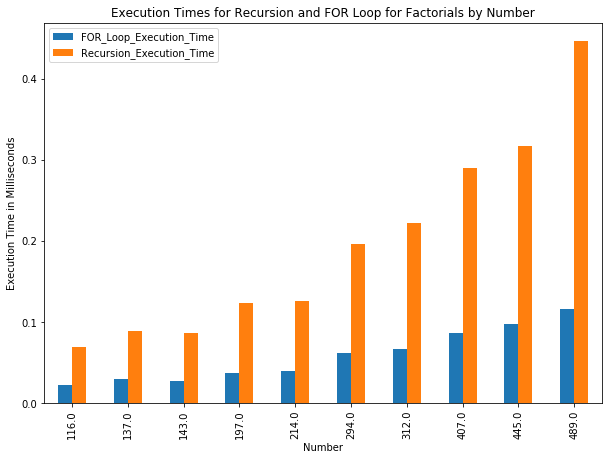

In [18]:
factorials_df_plot = factorials_df[['Array_Number', 'Recursion_Execution_Time', 'FOR_Loop_Execution_Time']].astype(float)

execution_times_pivot = pd.pivot_table(factorials_df_plot, index=factorials_df_plot['Array_Number'])
execution_times_plot = execution_times_pivot.loc[:,['FOR_Loop_Execution_Time', 'Recursion_Execution_Time'
                                                    ]].plot.bar(stacked=False, figsize=(10,7))
plt.ylabel('Execution Time in Milliseconds')
plt.xlabel('Number')
plt.title('Execution Times for Recursion and FOR Loop for Factorials by Number')
plt.show();

### Conclusion:
In this exercise the recursive algorithm was examined and compared with a loop algorithm using a FOR loop in relation to performance. Factorials of 10 random numbers between 100 and 500 were computed using both algorithms. A recursive algorithm basically works by having a function call itself until it reaches a solution for the value/item specified. The FOR loop modeled in this exercise looked similar to the recursive algorithm; however instead of calling itself, it went from range (n) and reached a solution by iterating through the range. Recursion is used to make finding a solution clearer; however, performance can be an issue as well as memory usage. In certain contexts, a loop will perform better than recursion, and may take up less memory. However, many important algorithms use recursion, and it is important for the data engineer to understand the concept. 

With regards to Big O notation, both are noted as having a **O(*n*)** run time. However, in this exercise, memory seemed to have been an issue as the recursive algorithm had call stacks that affected performance, and the difference in execution times were significant. Based on the results, it is recommended that a loop algorithm is used for scenarios where memory and performance is an issue for a recursive algorithm. With regards to its simplicity and efficiency, a recursive algorithm is recommended for the benefit of the programmer if memory and performance do not become and issue, which is especially useful to the data engineer. Though they both accomplish the same thing, the tradeoff between program performance and programmer performance should be weighed and taken into consideration in the context of client satisfaction. 

### References:
[1] Bhargava, A. Y. (2016.) Grokking Algorithms: An Illustrated Guide for Programmers and Other Curious People. Shelter Island, N.Y.: Manning. 

[2] https://yourbasic.org/algorithms/time-complexity-recursive-functions/